In [6]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

from pathlib import Path

# Jupyter stuff
from tqdm.auto import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline

# Custom functions
sys.path.insert(1, '../..')
%load_ext autoreload
%autoreload 2
from utils import *

# scperturb package
sys.path.insert(1, '../../package/src/')
from scperturb import *

from pathlib import Path
figure_path = Path('../../figures/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
DATADIR = Path('/data/gpfs-1/users/peidlis_c/work/data/perturbation_resource_paper')
TEMPDIR = Path("/fast/scratch/users/peidlis_c/perturbation_resource_paper/")

In [10]:
adata = sc.read(TEMPDIR / 'tmp_data_PapalexiSatija2021_eccite_RNA.h5')

In [11]:
def test_regime(adata, downsampling_rate=0.95, N=10):
    # compute original edistance and counts
    ed_original = edist_to_control(adata, verbose=False)
    cts_original = adata.obs.perturbation.value_counts()
    bfds = []
    for n in tqdm(range(N)):
        # subsample adata
        subdata = sc.pp.subsample(adata, fraction=downsampling_rate, copy=True)
        # compute edistance of subsampled
        ed_sub = edist_to_control(subdata, verbose=False).loc[ed_original.index]
        cts_sub = subdata.obs.perturbation.value_counts().loc[ed_original.index]

        # compute the backward finite difference to estimate gradient of edistance w.r.t. cell counts
        backward_finite_difference = (ed_original.distance - ed_sub.distance) / (cts_original - cts_sub)
        bfds.append(backward_finite_difference)
    return pd.concat(bfds, axis=1).mean(1)

In [12]:
bfd = test_regime(adata, downsampling_rate=0.95)

100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


In [13]:
subdata = sc.pp.subsample(adata, fraction=0.7, copy=True)
bfd_ = test_regime(subdata, downsampling_rate=0.95)

100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


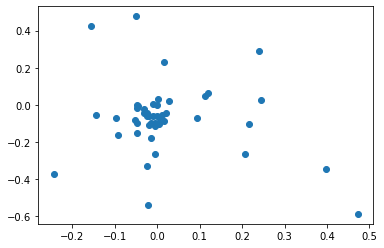

In [14]:
pl.scatter(bfd, bfd_)

In [15]:
subdata

AnnData object with n_obs × n_vars = 6580 × 15987
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'n_counts', 'perturbation_X'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [16]:
adata

AnnData object with n_obs × n_vars = 9400 × 15987
    obs: 'hto', 'guide_id', 'hto_barcode', 'gdo_barcode', 'perturbation', 'tissue_type', 'cell_line', 'cancer', 'disease', 'perturbation_type', 'celltype', 'organism', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'n_counts', 'perturbation_X'
    var: 'ensembl_id', 'ncounts', 'ncells', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'